In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

%matplotlib inline

In [2]:
df = pd.read_csv("Data/features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [44]:
df.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

In [7]:
ipd.Audio('Data/genres_original/blues/blues.00012.wav')

In [21]:
genres = df['label'].unique()

In [26]:
audio_paths = [f'Data/genres_original/{g}/{g}.00000.wav' for g in genres]
audio_paths

['Data/genres_original/blues/blues.00000.wav',
 'Data/genres_original/classical/classical.00000.wav',
 'Data/genres_original/country/country.00000.wav',
 'Data/genres_original/disco/disco.00000.wav',
 'Data/genres_original/hiphop/hiphop.00000.wav',
 'Data/genres_original/jazz/jazz.00000.wav',
 'Data/genres_original/metal/metal.00000.wav',
 'Data/genres_original/pop/pop.00000.wav',
 'Data/genres_original/reggae/reggae.00000.wav',
 'Data/genres_original/rock/rock.00000.wav']

# Mel-frequency cepstral coefficients (MFCCs)

Poniżej przedstawiam wizualizację [MFCC](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), czyli współczynników, które składają się na reprezentację pewnego spektrum dźwięku (TODO: zrobić opis, który faktycznie coś tłumaczy)

TODO
1) wytłumaczyć skąd się biorą
2) wytłumaczyć intuicję

In [46]:
def visualize_mfcc(audio_path, ax):
    y, sr = librosa.load(audio_path, sr=None)
    
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    img = librosa.display.specshow(
        mfccs, 
        sr=sr, 
        x_axis='time', 
        ax=ax,
        # vmin=-200,
        # vmax=200,
    )
    
    title = audio_path.split('/')[-1]
    ax.set_title(f'{title}', pad=10)
    ax.set_ylabel("MFCC\nindex", fontsize=9)

    return img

Text(0, 0.5, 'MFCC value')

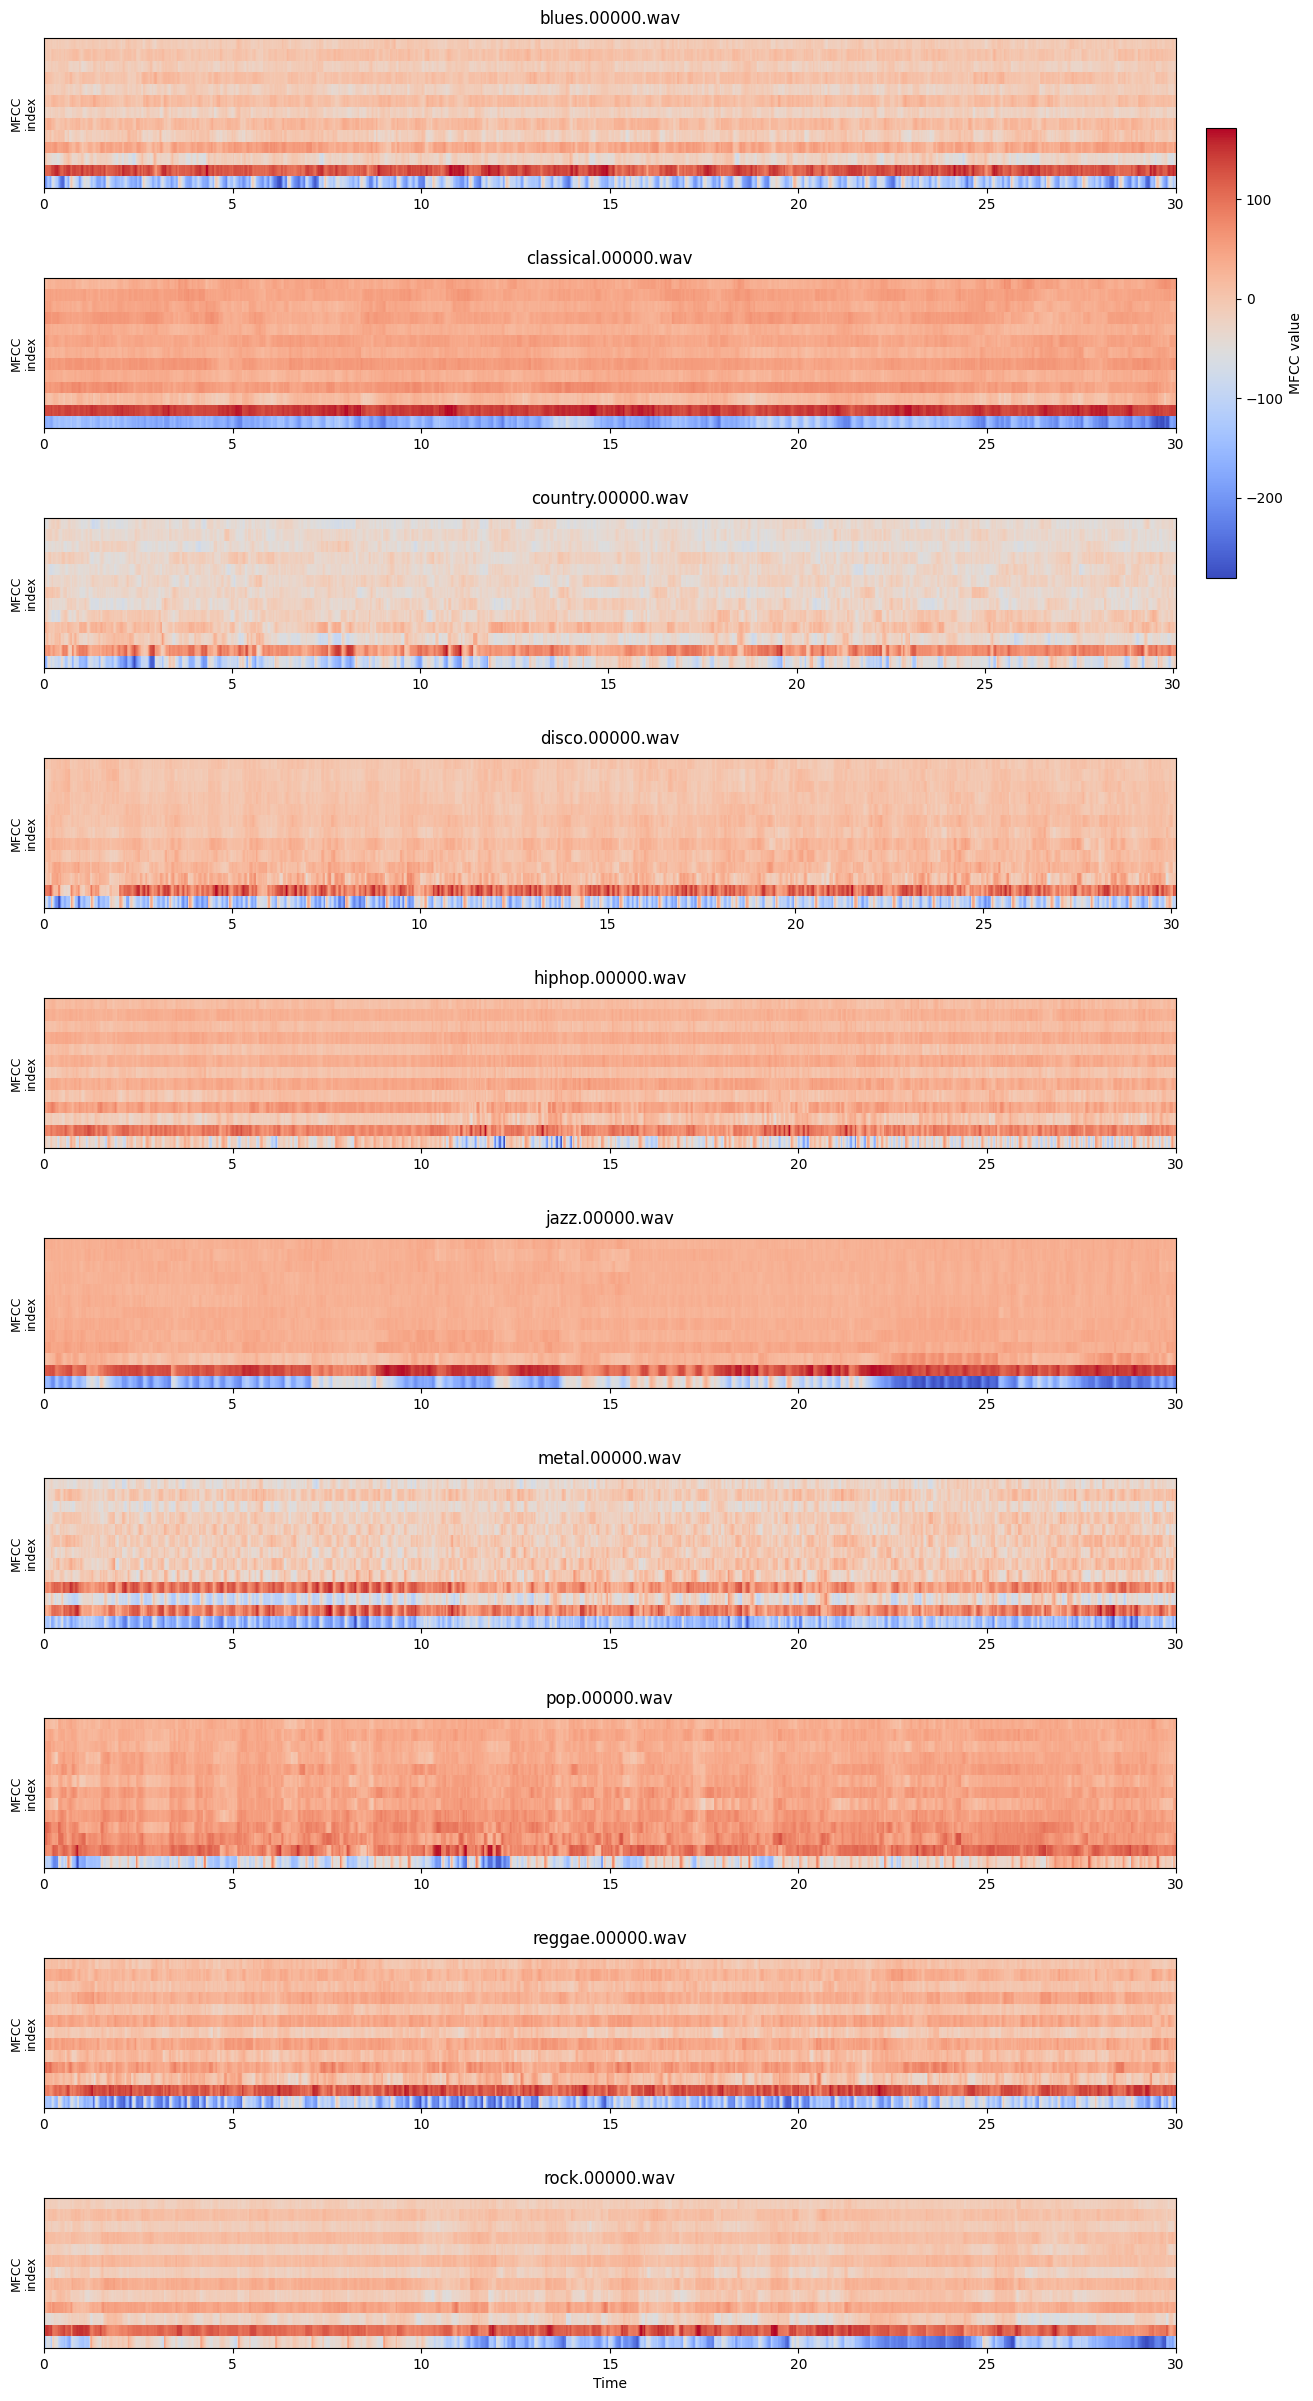

In [54]:
fg, axs = plt.subplots(len(audio_paths), 1, figsize=(15, 30))

for i, ap in enumerate(audio_paths):
    img = visualize_mfcc(ap, axs[i])

fg.subplots_adjust(hspace=0.6, right=0.88)

for ax in axs[:-1]:
    ax.set_xlabel("")

cbar_ax = fg.add_axes([0.9, 0.70, 0.02, 0.15])
fg.colorbar(img, cax=cbar_ax)
cbar_ax.set_ylabel("MFCC value", fontsize=10)

# Baseline model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

In [59]:
X, y = df.drop(['filename', 'length', 'label'], axis=1), df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
model = svm.SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [66]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy = {acc:0.2f}')

Baseline model accuracy = 0.21
